In [5]:
import Super_pikalucario as SPC
from sklearn.datasets import load_wine

import pandas as pd
import numpy as np


In [2]:
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


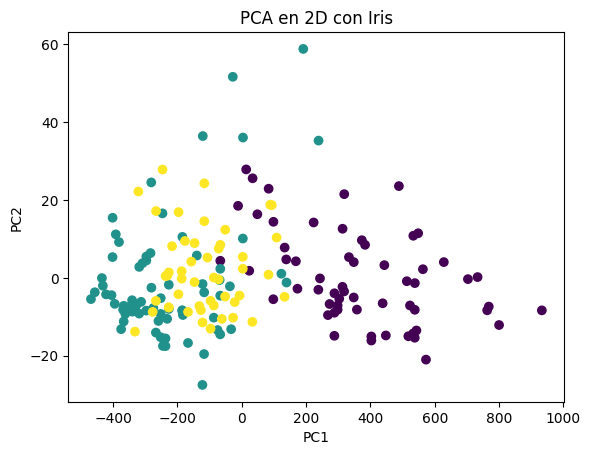

Varianza explicada acumulada: [0.99809123 0.99982715 0.99992211 0.99997232 0.99998469 0.99999315
 0.99999596 0.99999748 0.99999861 0.99999933 0.99999971 0.99999992
 1.        ]


In [ ]:
import matplotlib.pyplot as plt

# Cargar datos
wine = load_wine()
X = wine.data
y = wine.target

# Crear objeto MIPCA y ajustar
pca = SPC.MIPCA()
pca.ajustar(X)

# Transformar a 2 componentes
X_pca = pca.transformar(X, 2)

# Graficar resultados
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA en 2D con Iris")
plt.show()

# Varianza explicada
print("Varianza explicada acumulada:", pca.varianza_explicada())


Inercia final (sin tol): 2370689.686782968
Convergió en 10 iteraciones con tolerancia 0.001
Inercia final (con tol): 2370689.686782968


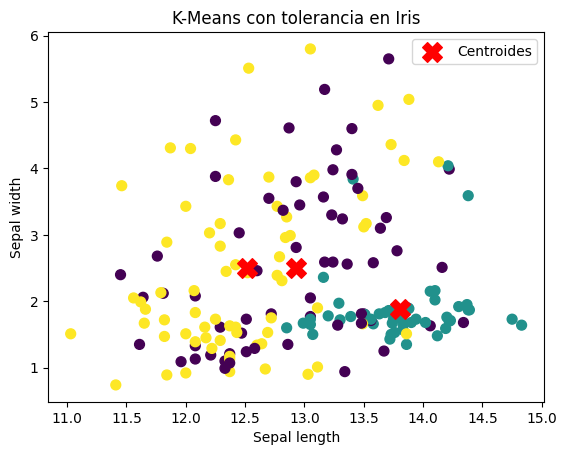

In [7]:
# KMeans SIN tolerancia
kmeans1 = SPC.MiKMeans(n_clusters=3, max_iter=300, tol=0, random_state=42)
kmeans1.ajustar(X)
print("Inercia final (sin tol):", kmeans1.inertia_)

# KMeans CON tolerancia
kmeans2 = SPC.MiKMeans(n_clusters=3, max_iter=300, tol=1e-3, random_state=42)
kmeans2.ajustar(X)
print("Inercia final (con tol):", kmeans2.inertia_)

# Graficar resultados (usando solo 2 variables para visualización)
plt.scatter(X[:, 0], X[:, 1], c=kmeans2.labels_, cmap="viridis", s=50)
plt.scatter(kmeans2.centroids[:, 0], kmeans2.centroids[:, 1], 
            c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("K-Means con tolerancia en Iris")
plt.legend()
plt.show()